In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

C:\Users\Dcat_BI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## DATA DESCRIPTION
![](https://i.ibb.co/WF7Q1s7/Screenshot-25-02-2020-141202.jpg)

## **Loading data with pandas**

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* **There is no null row in dataset but numeric columns doesn't seem to be normally distributed. Generally standart deviations are much higher than averages.**

In [5]:
## Let's get rid of that ugly column name.
df.rename(columns={"default.payment.next.month":"Target"}, inplace = True)

In [6]:
print(df["MARRIAGE"].unique())
print(df["SEX"].unique())
print(df["EDUCATION"].unique())
print(df["PAY_0"].unique())

[1 2 3 0]
[2 1]
[2 1 3 5 4 6 0]
[ 2 -1  0 -2  1  3  4  8  7  5  6]


* **There are some poorly labeled rows in data set. There is no match between data description and data set. For example: Description say "MARRIAGE column: Marital Status 1=Married, 2-Single, 3-Others" but in real data there are 4 unique values (0-1-2-3) so I will replace 0 with 3. Same mistake made in different columns like EDUCATION and payment columns (PAY_0, PAY_2 etc. so I will replace them with logical values.**


In [7]:
df['MARRIAGE'].replace({0 : 3},inplace = True)
df["EDUCATION"].replace({6 : 5, 0 : 5}, inplace = True)
df["PAY_0"].replace({-1 : 0, -2 : 0}, inplace = True)
df["PAY_2"].replace({-1 : 0, -2 : 0}, inplace = True)
df["PAY_3"].replace({-1 : 0, -2 : 0}, inplace = True)
df["PAY_4"].replace({-1 : 0, -2 : 0}, inplace = True)
df["PAY_5"].replace({-1 : 0, -2 : 0}, inplace = True)
df["PAY_6"].replace({-1 : 0, -2 : 0}, inplace = True)

In [8]:
print(df["PAY_0"].unique())
print(df["PAY_2"].unique())
print(df["PAY_3"].unique())
print(df["PAY_4"].unique())
print(df["PAY_5"].unique())
print(df["PAY_6"].unique())

[2 0 1 3 4 8 7 5 6]
[2 0 3 5 7 4 1 6 8]
[0 2 3 4 6 7 1 5 8]
[0 2 3 4 5 7 6 1 8]
[0 2 3 5 4 7 8 6]
[0 2 3 6 4 7 8 5]


In [9]:
## Original data set might be needed so let's backup it. 
df2 = df.copy()

* **First of all, we will look at the correlation matrix. Although some columns are categorical data type,they have numeric values so we can directly use df.corr. If categorical values were string, we have to get rid of them.**

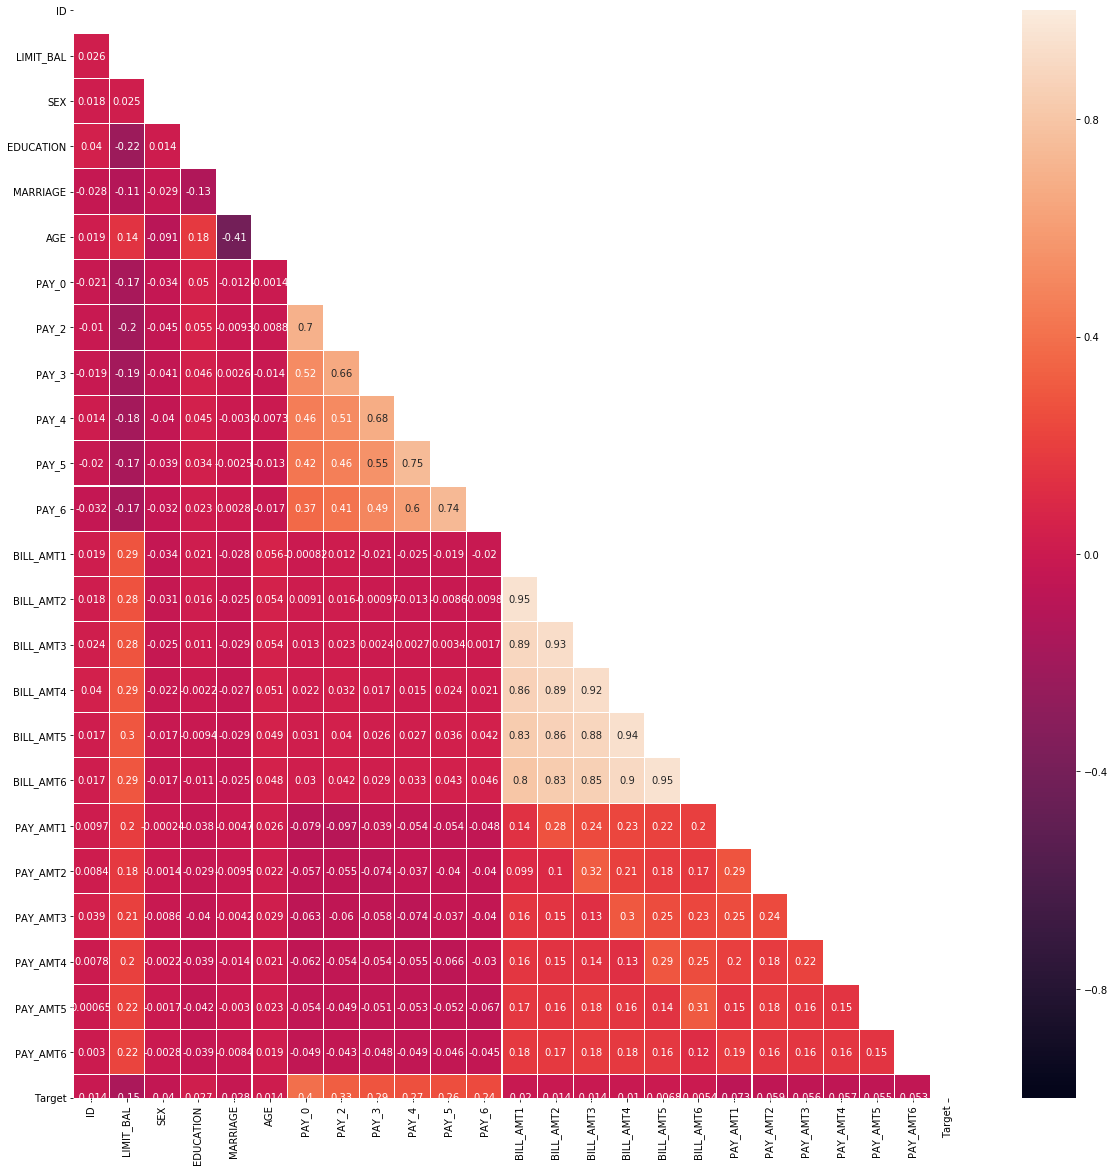

In [10]:
## .corr generate correlation matrix in df columns.
corr = df.corr()
## np.zeros_like generates matrix which is same shape with correlation matrix so we can use it like mask for inner triangle matrix. 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot = True, mask = mask)

* **There is no strong correlation between Target and features. The highest correlation is approximately 0.4, between "Target" and "PAY_0".**
* **Let's get rid of categorical columns with get_dummies method. More information about get_dummies** [get_dummies.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [11]:
cat_col = ["SEX","MARRIAGE","EDUCATION"]
df = pd.get_dummies(df, columns = cat_col)

*  **If SEX_2 = 1 means customer is female, if it is == 0 customer is male, on the other hand SEX_1 = 1 means customer is male, otherwise is female, so i dropped this columns, . Actually these two columns shows exactly same things.**

In [12]:
df.drop(columns=["SEX_2","ID"], inplace = True)

In [13]:
## For showing all columns 
pd.set_option('display.max_columns', 50)
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Target,SEX_1,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5
0,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,1,0,0,0
1,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,0,1,0,0,1,0,0,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,1,0,0,1,0,0,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,0,1,0,0,0
4,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,1,0,0,0,1,0,0,0


* **Let's look at the distributions of features with seaborn pair plot. Citation: "The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column." Get more information about pair plot [Sns_Pairplot.](https://seaborn.pydata.org/generated/seaborn.pairplot.html)**

In [14]:
## Preparing data for pairplotting
df_vis = df[["LIMIT_BAL","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]
df_vis2 = df[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","AGE"]]

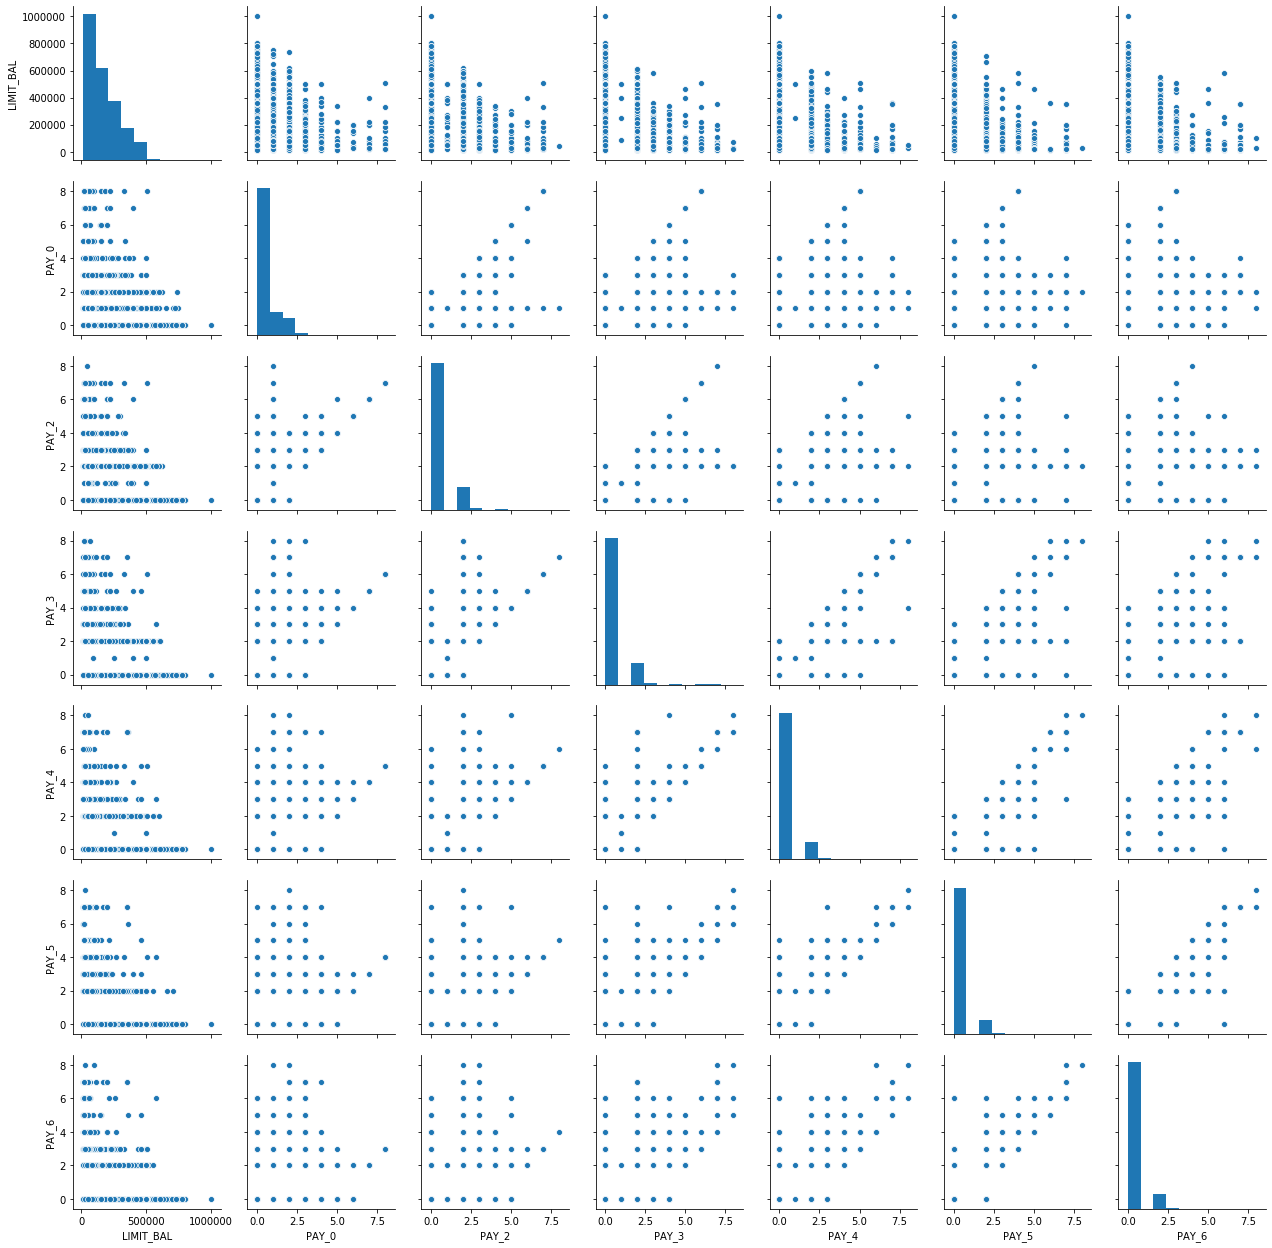

In [15]:
pp1 = sns.pairplot(df_vis)

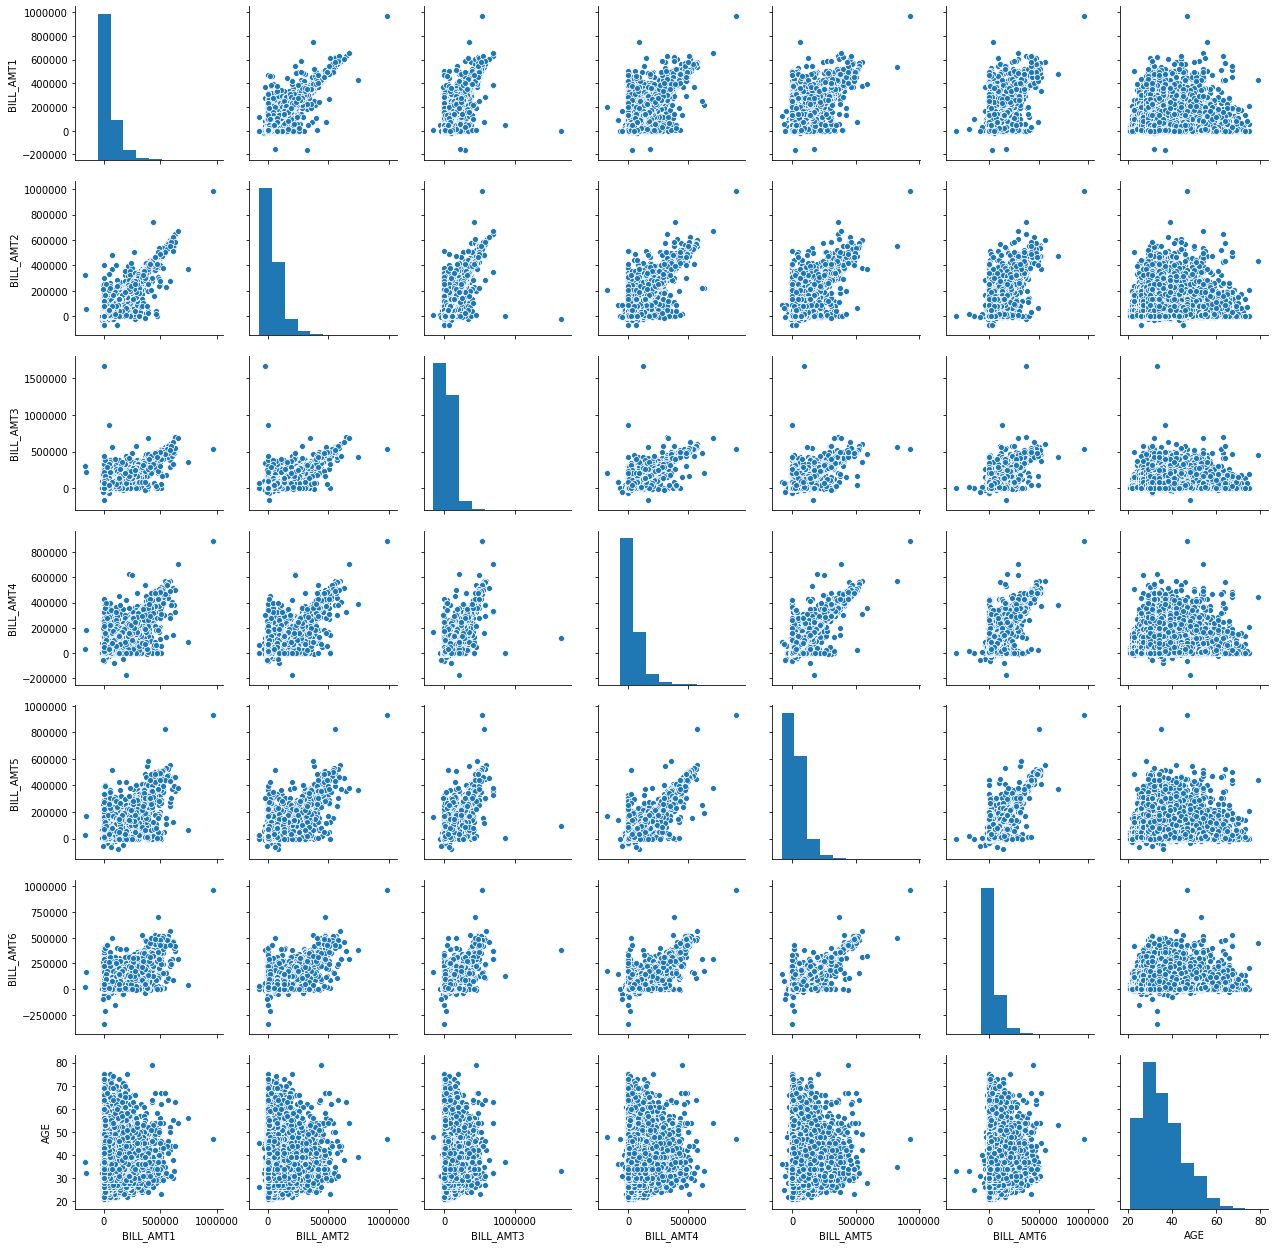

In [16]:
pp2 = sns.pairplot(df_vis2)

* **As we have guessed before, numerical features does not seem normally distributed.(Diagonal plots)**


In [17]:
## Pre-processing for building ML model. 
X = df.loc[:,df.columns != "Target"]
Y = df["Target"].copy()

In [18]:
## Importing necessary libraries 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X["BILL_AMT1"] = scaler.fit_transform(np.array(X["BILL_AMT1"]).reshape(-1,1))
X["BILL_AMT2"] = scaler.fit_transform(np.array(X["BILL_AMT2"]).reshape(-1,1))
X["BILL_AMT3"] = scaler.fit_transform(np.array(X["BILL_AMT3"]).reshape(-1,1))
X["BILL_AMT4"] = scaler.fit_transform(np.array(X["BILL_AMT4"]).reshape(-1,1))
X["BILL_AMT5"] = scaler.fit_transform(np.array(X["BILL_AMT5"]).reshape(-1,1))
X["BILL_AMT6"] = scaler.fit_transform(np.array(X["BILL_AMT6"]).reshape(-1,1))
X["PAY_AMT1"] = scaler.fit_transform(np.array(X["PAY_AMT1"]).reshape(-1,1))
X["PAY_AMT2"] = scaler.fit_transform(np.array(X["PAY_AMT2"]).reshape(-1,1))
X["PAY_AMT3"] = scaler.fit_transform(np.array(X["PAY_AMT3"]).reshape(-1,1))
X["PAY_AMT4"] = scaler.fit_transform(np.array(X["PAY_AMT4"]).reshape(-1,1))
X["PAY_AMT5"] = scaler.fit_transform(np.array(X["PAY_AMT5"]).reshape(-1,1))
X["PAY_AMT6"] = scaler.fit_transform(np.array(X["PAY_AMT6"]).reshape(-1,1))
X["LIMIT_BAL"] = scaler.fit_transform(np.array(X["LIMIT_BAL"]).reshape(-1,1))

* **We will use ensemble ML algorithms and ,generally, these algorithms work better with scaled numbers so I use MinMax scaler method for scaling. MinMax method squeeze values between 1 and 0. Maximum value of column = 1 and minimum value of column = 0**

In [21]:
## Control of the data 
X.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5
0,0.010101,24,2,2,0,0,0,0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,0,0
1,0.111111,26,0,2,0,0,0,2,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,0,0,1,0,0,1,0,0,0
2,0.080808,34,0,0,0,0,0,0,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0,0,1,0,0,1,0,0,0
3,0.040404,37,0,0,0,0,0,0,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0,1,0,0,0,1,0,0,0
4,0.040404,57,0,0,0,0,0,0,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,1,1,0,0,0,1,0,0,0


## **Feature Engineering**
* **We will use SelectKBest with both chi2 and f_classif method for feature extraction. I will extract 10 features from both methods then I will combine of two results. For more information about chi2 and f_classif [Get_info](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)**

In [22]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)
selector.fit(X, Y)
k = list(X.columns[selector.get_support(indices=True)])
k


['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'SEX_1',
 'EDUCATION_1',
 'EDUCATION_5']

In [23]:
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(f_classif, k=10)
selector.fit(X, Y)
k2 = list(X.columns[selector.get_support(indices=True)])
k2

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4']

In [24]:
cols_4_model = set(k+k2)
cols_4_model

{'EDUCATION_1',
 'EDUCATION_5',
 'LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4',
 'SEX_1'}

In [25]:
## Train and test split data
from sklearn.model_selection import train_test_split
X = X[cols_4_model]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [27]:
## List of ML Algorithms, we will use for loop for each algorithms.
models = [LogisticRegression(solver = "liblinear"),
          DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators =10),
          XGBClassifier(),
          GradientBoostingClassifier(),
          LGBMClassifier(),
         ]

In [29]:
for model in models:
    t0 = time.time()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    proba = model.predict_proba(X_test)
    roc_score = roc_auc_score(y_test, proba[:,1])
    cv_score = cross_val_score(model,X_train,y_train,cv=10).mean()
    score = accuracy_score(y_test,y_pred)
    bin_clf_rep = classification_report(y_test,y_pred)
    name = str(model)
    print(name[0:name.find("(")])
    print("Accuracy :", score)
    print("CV Score :", cv_score)
    print("AUC Score : ", roc_score)
    print(bin_clf_rep)
    print(confusion_matrix(y_test,y_pred))
    print("Time Taken :", time.time()-t0, "seconds")
    print("------------------------------------------------------------")

LogisticRegression
Accuracy : 0.8208
CV Score : 0.8159993192031576
AUC Score :  0.7665525793650794
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5820
           1       0.71      0.34      0.46      1680

    accuracy                           0.82      7500
   macro avg       0.77      0.65      0.68      7500
weighted avg       0.81      0.82      0.80      7500

[[5584  236]
 [1108  572]]
Time Taken : 1.1713290214538574 seconds
------------------------------------------------------------
DecisionTreeClassifier
Accuracy : 0.7281333333333333
CV Score : 0.7240901094894043
AUC Score :  0.6242060935198821
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5820
           1       0.39      0.40      0.40      1680

    accuracy                           0.73      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.73      0.73      0.73      7500

[[47

**TOP 2 Algorithms for both calculating time and accuracy score:**
* **Logistic Regression: CV Accuracy: 0.81 -- Time: 1.616 secs**
* **Light GBM : CV Accuracy: 0.81 -- Time: 5.36 secs**

**Now we will tune these two algorithms with GridSearchCV.
For more information about [GridSearchCV ]**(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [31]:
## LGBM_CLF Model
t0 = time.time()
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train,y_train)
y_pred = lgbm_model.predict(X_test)
proba = lgbm_model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, proba[:,1])
cv_score = cross_val_score(lgbm_model,X_train,y_train,cv=10).mean()
score = accuracy_score(y_test,y_pred)
bin_clf_rep = classification_report(y_test,y_pred)
print(name[0:name.find("(")])
print("Accuracy :", score)
print("CV Score :", cv_score)
print("AUC Score : ", roc_score)
print(bin_clf_rep)
print(confusion_matrix(y_test,y_pred))
print("Time Taken :", time.time()-t0, "seconds")
lgbm_model

LGBMClassifier
Accuracy : 0.8206666666666667
CV Score : 0.8179108651280721
AUC Score :  0.7776556619211258
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5820
           1       0.67      0.40      0.50      1680

    accuracy                           0.82      7500
   macro avg       0.76      0.67      0.69      7500
weighted avg       0.80      0.82      0.80      7500

[[5490  330]
 [1015  665]]
Time Taken : 4.6083667278289795 seconds


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [32]:
## Setting parameters for LGBM Model, we will use this dictionary with GridSearchCV
lgbm_params = {"n_estimators" : [100, 500, 1000],
               "subsample" : [0.6, 0.8, 1.0],
               "learning_rate" : [0.1, 0.01, 0.02],
               "min_child_samples" : [5, 10, 20]}

* **More information about LightGBM and parameters:
[LGBM_CLF](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)**

In [33]:
## n_jobs = -1 allows multicore processing for CPU
from sklearn.model_selection import GridSearchCV
lgbm_cv_model = GridSearchCV(lgbm_model, 
                             lgbm_params, 
                             cv = 5,
                             verbose = 1,
                             n_jobs = -1)

In [34]:
## Code works approximately 5-6 minutes
lgbm_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  6.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02],
                         

In [35]:
## Getting best parameters
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'min_child_samples': 20,
 'n_estimators': 1000,
 'subsample': 0.6}

In [37]:
## Best_Params with LGBM_CLF
t0 = time.time()
lgbm_model2 = LGBMClassifier(learning_rate = 0.01,
                            min_child_samples = 20,
                            n_estimators = 500,
                            subsample = 0.6)
lgbm_model2.fit(X_train,y_train)
y_pred = lgbm_model2.predict(X_test)
proba = lgbm_model2.predict_proba(X_test)
roc_score = roc_auc_score(y_test, proba[:,1])
cv_score = cross_val_score(lgbm_model2,X_train,y_train,cv=10).mean()
score = accuracy_score(y_test,y_pred)
bin_clf_rep = classification_report(y_test,y_pred)
print(name[0:name.find("(")])
print("Accuracy :", score)
print("CV Score :", cv_score)
print("AUC Score : ", roc_score)
print(bin_clf_rep)
print(confusion_matrix(y_test,y_pred))
print("Time Taken :", time.time()-t0, "seconds")

LGBMClassifier
Accuracy : 0.8246666666666667
CV Score : 0.8183992009128737
AUC Score :  0.7828385800196367
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      5820
           1       0.68      0.40      0.51      1680

    accuracy                           0.82      7500
   macro avg       0.77      0.67      0.70      7500
weighted avg       0.81      0.82      0.81      7500

[[5507  313]
 [1002  678]]
Time Taken : 23.455617904663086 seconds


* **LGBM with best parameters works with 0.81 CV Accuracy and it takes 23 seconds. I think this is not the most efficient algorithm for this data. So keep trying with Logistic Regression.**

In [39]:
## LOG_REG_CLF
t0 = time.time()
log_reg_model = LogisticRegression(solver="liblinear")
log_reg_model.fit(X_train,y_train)
y_pred = log_reg_model.predict(X_test)
proba = log_reg_model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, proba[:,1])
cv_score = cross_val_score(log_reg_model,X_train,y_train,cv=10).mean()
score = accuracy_score(y_test,y_pred)
bin_clf_rep = classification_report(y_test,y_pred)
print(name[0:name.find("(")])
print("Accuracy :", score)
print("CV Score :", cv_score)
print("AUC Score : ", roc_score)
print(bin_clf_rep)
print(confusion_matrix(y_test,y_pred))
print("Time Taken :", time.time()-t0, "saniye")

LGBMClassifier
Accuracy : 0.8208
CV Score : 0.8159993192031576
AUC Score :  0.7665525793650794
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5820
           1       0.71      0.34      0.46      1680

    accuracy                           0.82      7500
   macro avg       0.77      0.65      0.68      7500
weighted avg       0.81      0.82      0.80      7500

[[5584  236]
 [1108  572]]
Time Taken : 1.151343822479248 saniye


In [46]:
log_reg_params = {"C":[0.1, 0.5, 1.0], 
                  "penalty":["l1","l2"],
                  "solver" : ["liblinear"],
                  "max_iter" : [100,200,500]
                  }

* **More information about Logistic Regression and parameters:
[Logistic_Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**

In [47]:
from sklearn.model_selection import GridSearchCV
log_reg_cv_model = GridSearchCV(log_reg_model, 
                             log_reg_params, 
                             cv = 5,
                             verbose = 1,
                             n_jobs = -1)

In [48]:
log_reg_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.0], 'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [49]:
log_reg_cv_model.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [51]:
## Best Params with LOG_REG_CLF
t0 = time.time()
log_reg_model = LogisticRegression(solver="liblinear",
                                  C = 1.0,
                                  max_iter = 100,
                                  penalty = "l1",
                                  )
log_reg_model.fit(X_train,y_train)
y_pred = log_reg_model.predict(X_test)
proba = log_reg_model.predict_proba(X_test)
roc_score = roc_auc_score(y_test, proba[:,1])
cv_score = cross_val_score(log_reg_model,X_train,y_train,cv=10).mean()
score = accuracy_score(y_test,y_pred)
bin_clf_rep = classification_report(y_test,y_pred)
print(name[0:name.find("(")])
print("Accuracy :", score)
print("CV Score :", cv_score)
print("AUC Score : ", roc_score)
print(bin_clf_rep)
print(confusion_matrix(y_test,y_pred))
print("Time Taken :", time.time()-t0, "saniye")

LGBMClassifier
Accuracy : 0.8202666666666667
CV Score : 0.8161771365046745
AUC Score :  0.7679098654066437
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5820
           1       0.71      0.34      0.46      1680

    accuracy                           0.82      7500
   macro avg       0.77      0.65      0.67      7500
weighted avg       0.81      0.82      0.79      7500

[[5584  236]
 [1112  568]]
Time Taken : 0.7535693645477295 saniye


* **Logistic Regression with best parameters works with 0.81 CV accuracy and it takes 0.75 seconds. For this problem, log_reg is the best algorithm.**